In [1]:
import pandas as pd
import datetime

# 元となる脆弱性のデータ

In [2]:
vul_origin_data = pd.read_csv("./../vulnerability/packagist_vul_data.csv",delimiter=",")
vul_origin_data

,vulnerability_name,package_name,version_range,published_at,project_id
0,Moderate severity vulnerability that affects l...,league/commonmark,>=0 <0.18.3,2019-09-17T22:47:47Z,91325
1,Access of Resource Using Incompatible Type ('T...,yourls/yourls,>=0 <1.7.4,2019-09-23T18:32:02Z,116671
2,Missing Authentication for Critical Function i...,librenms/librenms,>=0 <1.50.1,2019-10-11T18:43:06Z,2347310
3,SQL Injection in LibreNMS,librenms/librenms,>=0 <1.53 || >=0 <1.50.1,2019-10-11T18:43:29Z,2347310
4,Incorrect Access Control vulnerability in api-...,api-platform/core,>=2.2.0 <2.2.10 || >=2.3.0 <2.3.6,2019-10-14T21:23:26Z,1226715
...,...,...,...,...,...
991,kelvinmo simplexrd vulnerable to Improper Rest...,kelvinmo/simplexrd,>=0 <3.1.1,2023-01-07T21:30:38Z,88869
992,Barzahlen Payment Module PHP SDK vulnerable to...,barzahlen/barzahlen-php,>=0 <2.0.1,2023-01-08T18:30:25Z,41301
993,Symbiote Seed Open Redirect vulnerability,symbiote/silverstripe-seed,>=0 <6.0.3,2023-01-07T21:30:38Z,2347547
994,PaginationServiceProvider SQL Injection vulner...,ttskch/pagination-service-provider,>=0 <1.0.0,2023-01-08T00:30:15Z,1525019


## 重複した脆弱性データがないか確認

In [103]:
vul_origin_data.groupby(["vulnerability_name", "package_name", "project_id"]).size().sort_values(ascending=False)

vulnerability_name                                                  package_name                 project_id
Arbitrary Code Execution in eslint-utils                            eslint-utils                 2775836       1
Prototype Pollution in lodash                                       lodash.template              167376        1
Regular Expression Denial of Service in underscore.string           underscore.string            326672        1
Regular Expression Denial of Service in remarkable                  remarkable                   306701        1
Regular Expression Denial of Service in csv-parse                   csv-parse                    276738        1
                                                                                                              ..
Denial of Service in mem                                            mem                          294767        1
Denial of Service in http-proxy-agent                               http-proxy-agent             1580

# 脆弱性影響の解析後データを分析

In [4]:
vul_data = pd.read_csv("./affected_packages_packagist_with_all.csv",delimiter=",")
vul_data

,project_id,vul_project_id,vul_start_datetime,vul_end_datetime,vul_start_timestamp,vul_end_timestamp,compliantType,vul_start_dependency_compliant,vul_start_version,vul_deps,vul_total_count,source_rank
0,102577,102585.0,2014-12-06 22:48:31 +0000 UTC,2023-02-03 15:12:00.097595 +0900 JST m=+0.1264...,1.417906e+09,1.675405e+09,2.0,>=2.1.0,3.0.0,0.0,1.0,0.0
1,786245,102585.0,2015-05-12 13:35:53 +0000 UTC,2023-02-03 15:12:00.098882 +0900 JST m=+0.1277...,1.431438e+09,1.675405e+09,1.0,^3.0.0,3.0.1,0.0,1.0,0.0
2,753716,102585.0,2015-05-14 14:36:09 +0000 UTC,2023-02-03 15:12:00.100599 +0900 JST m=+0.1294...,1.431614e+09,1.675405e+09,3.0,3.0.*,3.0.1,0.0,1.0,0.0
3,813369,102585.0,2015-06-02 13:11:21 +0000 UTC,2023-02-03 15:12:00.101396 +0900 JST m=+0.1302...,1.433251e+09,1.675405e+09,1.0,~3.0,3.0.1,0.0,1.0,10.0
4,900628,102585.0,2015-07-20 15:55:48 +0000 UTC,2023-02-03 15:12:00.102008 +0900 JST m=+0.1308...,1.437408e+09,1.675405e+09,2.0,*,3.0.1,0.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100883,96927,102516.0,2016-09-05 07:27:02 +0000 UTC,2016-11-14 06:39:40 +0000 UTC,1.473060e+09,1.479106e+09,1.0,^5.5,5.5.4,0.0,1.0,9.0
100884,96928,102516.0,2016-09-19 09:30:31 +0000 UTC,2016-11-14 06:39:40 +0000 UTC,1.474277e+09,1.479106e+09,1.0,^5.5,5.5.4,0.0,1.0,7.0
100885,96929,102516.0,2016-09-05 07:27:02 +0000 UTC,2016-11-14 06:39:40 +0000 UTC,1.473060e+09,1.479106e+09,1.0,^5.5,5.5.4,0.0,1.0,0.0
100886,96930,102516.0,2016-09-05 07:27:02 +0000 UTC,2016-11-14 06:39:40 +0000 UTC,1.473060e+09,1.479106e+09,1.0,^5.5,5.5.4,0.0,1.0,6.0


## 影響を与えたパッケージ数のランキング

In [5]:
vul_data.groupby("vul_project_id").size().sort_values(ascending=False)

vul_project_id
71994.0      69601
2345617.0     9019
112814.0      6717
107846.0      4520
91090.0       1634
             ...  
2183327.0        2
1140359.0        2
2708011.0        1
107862.0         1
2486091.0        1
Length: 64, dtype: int64

## 影響を受けた期間を計算

- 脆弱性受け終わりの時刻が現在時刻(2023年1月1日)付近であれば、脆弱性受け終わりの時刻を'2020-01-12 00:00:00'に上書きする
    - データセットの構築時の最新時刻に揃える
    - データセット: https://libraries.io/data

In [6]:
parsed_datetime = datetime.datetime(2023, 1, 1, 0, 0, 0, 0)
vul_end_last_datetime = datetime.datetime(2020, 1, 12, 0, 0, 0, 0)

vul_data["vul_end_datetime"] = vul_data["vul_end_datetime"].where(vul_data["vul_end_timestamp"] < parsed_datetime.timestamp(), vul_end_last_datetime.strftime('%Y-%m-%d %H:%M:%S'))
vul_data["vul_end_timestamp"] = vul_data["vul_end_timestamp"].where(vul_data["vul_end_timestamp"] < parsed_datetime.timestamp(), vul_end_last_datetime.timestamp())
vul_data["vul_months"] = (vul_data["vul_end_timestamp"] - vul_data["vul_start_timestamp"]) / (3600 * 24 * 30)
vul_data
vul_data["status"] = vul_data["vul_end_timestamp"] < vul_end_last_datetime.timestamp()

## データの分布


### 脆弱性の存続期間

<AxesSubplot: >

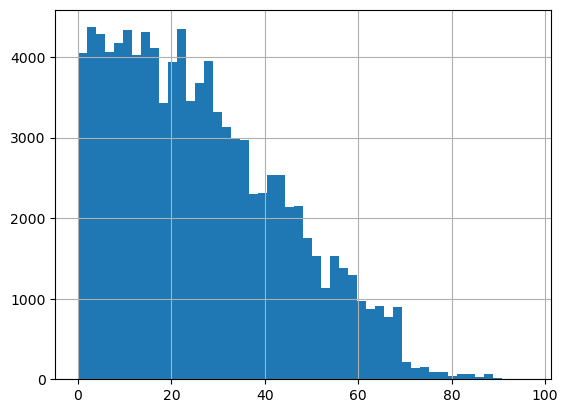

In [7]:
vul_data["vul_months"].hist(bins=50)

### semver準拠タイプごとの影響を受けたパッケージ数

- 1: (本番開発リリース)準拠している
- 2: (本番開発リリース)semverより緩い制約
- 3: (本番開発リリース)semverより厳しい制約
- 4: (初期開発リリース)準拠している
- 5: (初期開発リリース)semverより緩い制約

In [8]:
vul_data.groupby("compliantType").size()

compliantType
1.0    85258
2.0     6066
3.0     8267
4.0      106
5.0     1190
dtype: int64

# サバイバル分析

- ドキュメント: https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.nonparametric.kaplan_meier_estimator.html
    - Kaplan-Meier推定
        - https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%97%E3%83%A9%E3%83%B3%EF%BC%9D%E3%83%9E%E3%82%A4%E3%83%A4%E3%83%BC%E6%8E%A8%E5%AE%9A%E9%87%8F
    - 打ち切りデータもあってよい

In [9]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
import numpy as np

In [10]:
vul_data_compliant = vul_data[vul_data["compliantType"] == 1]
vul_data_permissive = vul_data[vul_data["compliantType"] == 2]
vul_data_restrictive = vul_data[vul_data["compliantType"] == 3]

### 生存関数

- 期間が長くなっても、Compliantな脆弱性が他に比べて生き残っている

Text(0.5, 0, 'time $t$')

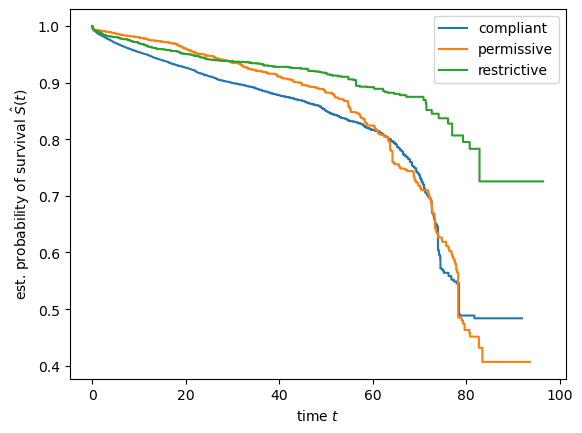

In [11]:
cph_compliant = CoxPHFitter()
cph_compliant.fit(pd.concat([vul_data_compliant["vul_months"], vul_data_compliant["status"].map(lambda x: 1 if x else 0),
                             # vul_data_compliant["project_id"]
                             ], axis=1), "vul_months", "status",
                  # weights_col="project_id",
                  robust=True)
survival_f_compliant = cph_compliant.predict_survival_function(np.arange(0, 100, 1000))


cph_permissive = CoxPHFitter()
cph_permissive.fit(pd.concat([vul_data_permissive["vul_months"], vul_data_permissive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_permissive = cph_permissive.predict_survival_function(np.arange(0, 100, 1000))

cph_restrictive = CoxPHFitter()
cph_restrictive.fit(pd.concat([vul_data_restrictive["vul_months"], vul_data_restrictive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_restrictive = cph_restrictive.predict_survival_function(np.arange(0, 100, 1000))


plt.step(survival_f_compliant.index, survival_f_compliant[0], where="post", label="compliant")
plt.step(survival_f_permissive.index, survival_f_permissive[0], where="post", label="permissive")
plt.step(survival_f_restrictive.index, survival_f_restrictive[0], where="post", label="restrictive")

plt.legend()

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

Text(0.5, 0, 'time $t$ [month]')

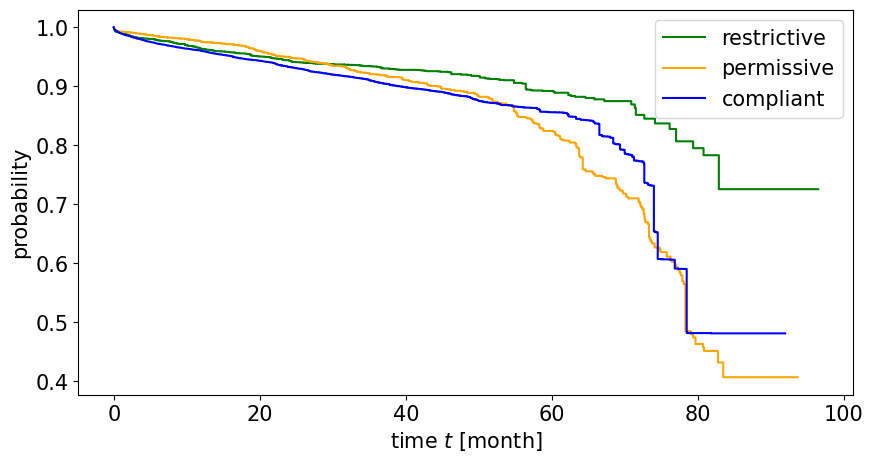

In [12]:
cph_compliant = CoxPHFitter()
cph_compliant.fit(pd.concat([vul_data_compliant["vul_months"], vul_data_compliant["status"].map(lambda x: 1 if x else 0),
                             vul_data_compliant["project_id"]
                             ], axis=1), "vul_months", "status",
                  weights_col="project_id",
                  robust=True)
survival_f_compliant = cph_compliant.predict_survival_function(np.arange(0, 100, 1000))


cph_permissive = CoxPHFitter()
cph_permissive.fit(pd.concat([vul_data_permissive["vul_months"], vul_data_permissive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_permissive = cph_permissive.predict_survival_function(np.arange(0, 100, 1000))

cph_restrictive = CoxPHFitter()
cph_restrictive.fit(pd.concat([vul_data_restrictive["vul_months"], vul_data_restrictive["status"].map(lambda x: 1 if x else 0)], axis=1), "vul_months", "status", robust=True)
survival_f_restrictive = cph_restrictive.predict_survival_function(np.arange(0, 100, 1000))

plt.rcParams["font.size"] = 15
plt.figure(figsize=[10, 5])
plt.step(survival_f_restrictive.index, survival_f_restrictive[0], where="post", label="restrictive", color="green")
plt.step(survival_f_permissive.index, survival_f_permissive[0], where="post", label="permissive", color="orange")
plt.step(survival_f_compliant.index, survival_f_compliant[0], where="post", label="compliant", color="blue")

plt.legend()

plt.ylabel("probability")
plt.xlabel("time $t$ [month]")

## 準拠タイプごとに脆弱性影響の生存期間を分析

### Compliant

In [13]:
vul_data_compliant["vul_months"].describe()

count    85258.000000
mean        25.536096
std         17.510893
min         -0.045531
25%         11.018482
50%         22.676030
75%         37.499951
max         91.940333
Name: vul_months, dtype: float64

<AxesSubplot: >

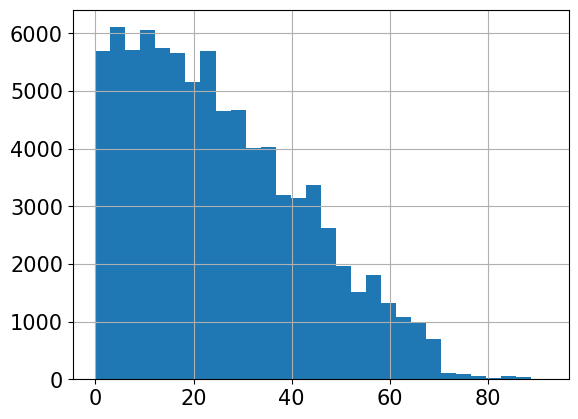

In [14]:
vul_data_compliant["vul_months"].hist(bins=30)

### Permissive

- Compliantより生存期間が長い
    - なんで？

In [15]:
vul_data_permissive["vul_months"].describe()

count    6066.000000
mean       27.599552
std        20.210461
min         0.000018
25%        11.665753
50%        25.768669
75%        37.183171
max        93.634682
Name: vul_months, dtype: float64

<AxesSubplot: >

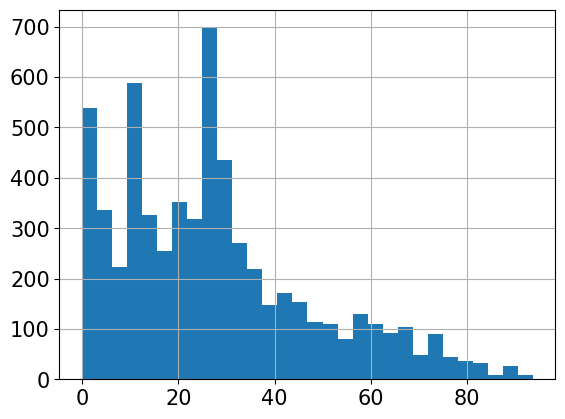

In [16]:
vul_data_permissive["vul_months"].hist(bins=30)

### Restrictive

<AxesSubplot: >

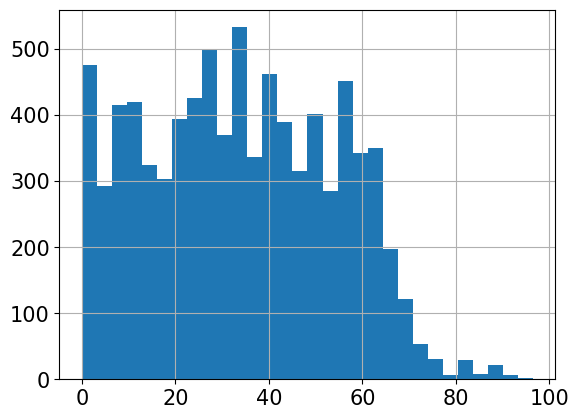

In [17]:
vul_data_restrictive["vul_months"].hist(bins=30)

In [18]:
vul_data_restrictive["vul_months"].describe()

count    8267.000000
mean       33.968047
std        19.987313
min         0.000000
25%        17.773995
50%        33.233021
75%        50.555476
max        96.472621
Name: vul_months, dtype: float64

<AxesSubplot: >

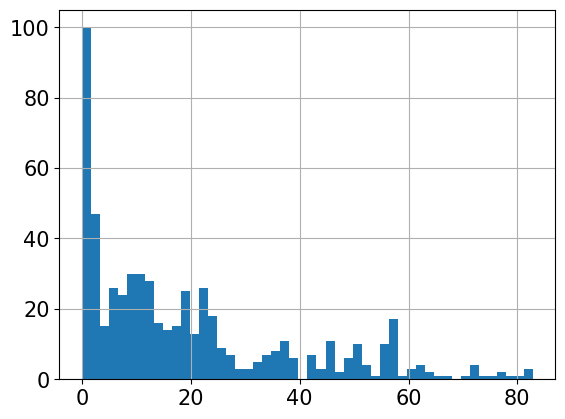

In [19]:
vul_data_restrictive["vul_months"][vul_data_restrictive["vul_end_timestamp"] < vul_end_last_datetime.timestamp()].hist(bins=50)